In [1]:
!pip install -q transformers==4.44.* --force-reinstall
!pip uninstall numpy -y
!pip install numpy==1.26.0 
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [2]:
!pip install -q packaging
!pip install -q ninja
!pip install -q flash_attn
!pip install -q datasets
!pip install -q timm
!pip install -q einops
!pip install -q peft
!pip install -q deepspeed
!pip install -q bitsandbytes
!pip install -q decord
!pip install -q gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Load model

In [3]:
import os
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height
    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []

    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )

        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)

    assert len(processed_images) == blocks

    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    #check image_file is a path or image
    if isinstance(image_file, str):
        image = Image.open(image_file).convert('RGB')
    else:
        image = image_file

    image = image.resize((input_size, input_size))
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

In [4]:
model_name = "/kaggle/input/vintern_1b_v3_finetune_lora_viet_handwriting/pytorch/default/1/Vintern_1B_v3_finetune_lora_viet_handwriting"
tokenizerOCR = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, use_fast=False)
modelOCR = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).eval().cuda()

configuration_internvl_chat.py:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.2k [00:00<?, ?B/s]

conversation.py:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/5CD-AI/Vintern-1B-v2:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, TextStreamer
import torch

base_model = "/kaggle/input/llama-3.2/transformers/3b-instruct/1"

base_tokenizer = AutoTokenizer.from_pretrained(base_model)

model = AutoModelForCausalLM.from_pretrained(
    base_model,
    return_dict=True,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True,
)

2025-05-28 09:32:31.756435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748424751.943338      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748424752.008793      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
if base_tokenizer.pad_token_id is None:
    base_tokenizer.pad_token_id = base_tokenizer.eos_token_id
if model.config.pad_token_id is None:
    model.config.pad_token_id = model.config.eos_token_id

In [7]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=base_tokenizer,
    torch_dtype=torch.float16,
    device_map="auto",
)

# Load Data

In [8]:
!pip install pdf2image pandas
!apt-get install -y poppler-utils




The following additional packages will be installed:
  libpoppler-dev libpoppler-private-dev libpoppler118
The following NEW packages will be installed:
  poppler-utils
The following packages will be upgraded:
  libpoppler-dev libpoppler-private-dev libpoppler118
3 upgraded, 1 newly installed, 0 to remove and 84 not upgraded.
Need to get 1,462 kB of archives.
After this operation, 700 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-private-dev amd64 22.02.0-2ubuntu0.8 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-dev amd64 22.02.0-2ubuntu0.8 [5,186 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler118 amd64 22.02.0-2ubuntu0.8 [1,072 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 1,462 kB in 1s (1,048 kB/s)
(Reading database ... 129184 files and directories currently installed

In [9]:
import os
import pandas as pd
from pdf2image import convert_from_path
from transformers import logging
logging.set_verbosity_error()
from tqdm import tqdm

In [10]:
input_folder = "/kaggle/input/data-test2"

In [11]:
def extract_test(images): 
     full_text = ""
     question = '<image>\nTrích xuất toàn bộ văn bản trong ảnh.'
     generation_config = dict(max_new_tokens= 1024, do_sample=False, num_beams = 3, repetition_penalty=2.0)
     for img in images:
          width, height = img.size
          part_height = height // 4
          text = ""
          for i in range(4):
              top = i * part_height
              bottom = (i + 1) * part_height if i < 3 else height  # phần cuối lấy hết phần dư
              cropped_image = img.crop((0, top, width, bottom))
              pixel_values = load_image(cropped_image, max_num=12).to(torch.bfloat16).cuda()
              response = modelOCR.chat(tokenizerOCR, pixel_values, question, generation_config)
              text = text + "\n" + response
              
          plt.figure(figsize=(8, 6)) 
          plt.imshow(img)  
          plt.axis('off')  
          plt.tight_layout()
          plt.show()  
          print(text)
          full_text = full_text + "\n" + text
     return full_text

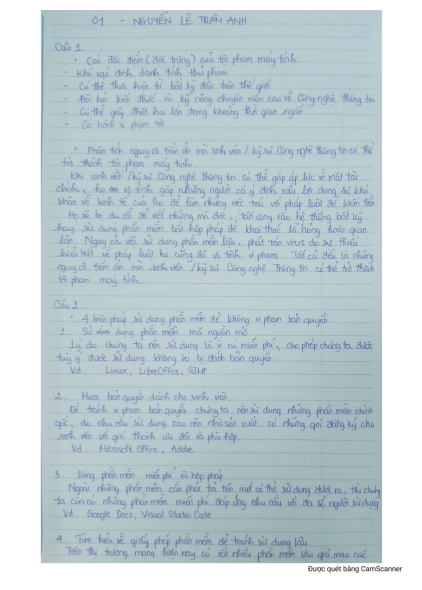


01 - NGUYỄN LÊ TRẦM ANH
Câu 1.
• Các đặc điểm (đặc trưng) của tội phạm máy tính.
- Khó xác định danh tính thủ phạm
- Có thể thực hiện từ bất kỳ đầu tiên trên thế giới
- Đôi hỏi kiến thức và kỹ năng chuyên môn cao về Công nghệ thông tin
- Có thể gây thiệt hại lớn trong khoảng thời gian ngắn
- Có hành vi phạm tội
• Phân tích nguy cơ tiền ăn ngon mà sinh viên / lũ sử dụng mạng thông tin có thể
trở thành tội phạm máy tính.
Khi sinh/kỹ sự Công nghệ thông tin có thể gặp áp lực về mặt tài
chính, họ và vô tình gặp những người có ý xấu lợi dụng sự khó
khăn về kinh tế của họ để làm những việc trái với pháp luật để kiến tiền.
Họ sẽ bị dụ dỗ để viết những mã đời, tấn công vào hệ thống bất kỳ
hay sử dụng phần mềm bất hợp pháp để khai thác lỗ hổng hoặc gian
lận. Ngay cả việc sử dụng phần mềm lâu, phát tán virus do sự thiếu
hiểu biết về pháp luật họ cũng đã vô tình vi phạm. Tất cả đều là những
nguy cơ tiềm ẩn mà nhân viên / Lấy sự Công nghệ Thông tin có thể trở thành
tội phạm máy tính.
Câu 2.
* 4 bi

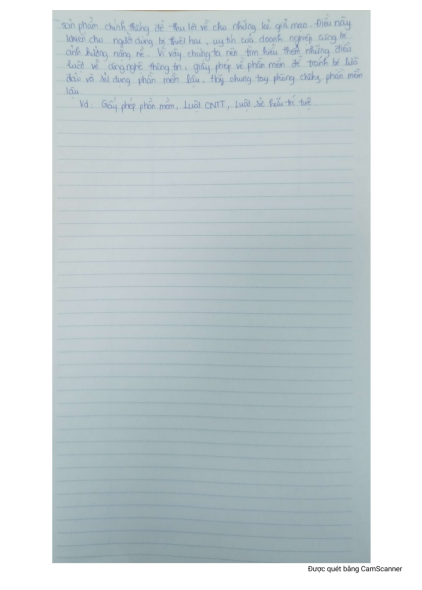


sản phẩm chính thống để thu lợi về cho những kẻ giả mạo. Điều này
khiến cho người dùng bị thiệt hại, uy tín của doanh nghiệp cũng bị
ảnh hưởng nặng nề. Vì vậy chúng ta nên tìm hiểu thêm những điều
luật về công nghệ thùng tin, giấy phép về phần mềm để tránh bị lừa
đảo và sử dụng phần mềm lâu. Hãy chung tay phòng chống phần mềm
lậu.
Vd. Giấy phép phần mềm, Luật CNTT, Luật sử hữu trí tuệ.
Trang giấy có 10 dòng.
Trang giấy có 10 đường kẻ ngang và 10 đường kẻ dọc.
Được quét bằng CamScanner


In [12]:
for folder in os.listdir(input_folder):
    if folder.lower().endswith(".pdf"):
        pdf_path = os.path.join(input_folder, folder)
        base_id = os.path.splitext(folder)[0]
        try:
            images = convert_from_path(pdf_path, dpi=300)
        except Exception as e:
            print(f"Lỗi khi đọc PDF {pdf_path}: {e}")
        text = extract_test(images)
    else:
        folder_path = os.path.join(input_folder, folder)
        for filename in tqdm(os.listdir(os.path.join(input_folder, folder))):

            pdf_path = os.path.join(folder_path, filename)
            base_id = os.path.basename(folder) + "_" + os.path.splitext(filename)[0]
            try:
                images = convert_from_path(pdf_path, dpi=300)
            except Exception as e:
                print(f"Lỗi khi đọc PDF {pdf_path}: {e}")
                continue
            text = ""
            for img in images:
                width, height = img.size
                part_height = height // 4
                for i in range(4):
                    top = i * part_height
                    bottom = (i + 1) * part_height if i < 3 else height  # phần cuối lấy hết phần dư
                    cropped_image = img.crop((0, top, width, bottom))
                    pixel_values = load_image(cropped_image, max_num=12).to(torch.bfloat16).cuda()
                    response = model.chat(tokenizer, pixel_values, question, generation_config)
                    text = text + "\n" + response
            data.append({"id": base_id, "text": text})

In [13]:
print(text)



01 - NGUYỄN LÊ TRẦM ANH
Câu 1.
• Các đặc điểm (đặc trưng) của tội phạm máy tính.
- Khó xác định danh tính thủ phạm
- Có thể thực hiện từ bất kỳ đầu tiên trên thế giới
- Đôi hỏi kiến thức và kỹ năng chuyên môn cao về Công nghệ thông tin
- Có thể gây thiệt hại lớn trong khoảng thời gian ngắn
- Có hành vi phạm tội
• Phân tích nguy cơ tiền ăn ngon mà sinh viên / lũ sử dụng mạng thông tin có thể
trở thành tội phạm máy tính.
Khi sinh/kỹ sự Công nghệ thông tin có thể gặp áp lực về mặt tài
chính, họ và vô tình gặp những người có ý xấu lợi dụng sự khó
khăn về kinh tế của họ để làm những việc trái với pháp luật để kiến tiền.
Họ sẽ bị dụ dỗ để viết những mã đời, tấn công vào hệ thống bất kỳ
hay sử dụng phần mềm bất hợp pháp để khai thác lỗ hổng hoặc gian
lận. Ngay cả việc sử dụng phần mềm lâu, phát tán virus do sự thiếu
hiểu biết về pháp luật họ cũng đã vô tình vi phạm. Tất cả đều là những
nguy cơ tiềm ẩn mà nhân viên / Lấy sự Công nghệ Thông tin có thể trở thành
tội phạm máy tính.
Câu 2.
* 4 b

In [14]:
questions = [
    'Bài làm trên có phân tích đủ sáu ý về tội phạm máy tính hay không',
    'Bài làm trên có công nhận việc sử dụng phần mềm mã nguồn mở như Ubuntu hay LibreOffice có phải là một cách hợp pháp để tránh vi phạm bản quyền phần mềm không?',
    
]

In [15]:
import pandas as pd
from tqdm import tqdm

results = []

for idx, q in tqdm(enumerate(questions), total=len(questions), desc="Đang thực hiện chấm bài"):
    messages = [
        {
            "role": "system",
            "content": "Bạn là một trợ lý đánh giá bài làm sinh viên. Trả lời câu hỏi chỉ với YES hoặc NO.",
        },
        {
            "role": "user",
            "content": f"""Dưới đây là nội dung bài làm:\n{text}\n\n+ Câu hỏi: "{q}"\n+ Hãy trả lời chính xác và chỉ trả lời "YES" hoặc "NO".""",
        },
    ]

    # Tạo prompt đầu vào từ messages
    prompt = base_tokenizer.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )

    try:
        outputs = pipe(prompt, max_new_tokens=512, do_sample=True)

        # Tách phần trả lời từ mô hình
        raw_output = outputs[0]["generated_text"]
        if "<|start_header_id|>assistant<|end_header_id|>" in raw_output:
            model_answer = raw_output.split("<|start_header_id|>assistant<|end_header_id|>")[1].strip()
        else:
            model_answer = raw_output.strip()

        results.append({
            "id": f"Câu hỏi {idx+1}",
            "question": q,
            "model_answer": model_answer,
        })

    except Exception as e:
        print(f"Lỗi khi xử lý câu hỏi {idx+1}: {e}")
        results.append({
            "id": f"Câu hỏi {idx+1}",
            "question": q,
            "model_answer": "ERROR",
        })

# Ghi kết quả ra file CSV
df_results = pd.DataFrame(results)
output_file = "result.csv"
df_results.to_csv(output_file, index=False)
print(f"CSV file saved as: {output_file}")

# Hiển thị kết quả đầu tiên
display(df_results.head(20))


Đang thực hiện chấm bài: 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

CSV file saved as: result.csv


,id,question,model_answer
0,Câu hỏi 1,Bài làm trên có phân tích đủ sáu ý về tội phạm...,NO
1,Câu hỏi 2,Bài làm trên có công nhận việc sử dụng phần mề...,YES


In [16]:
from PIL import Image
image_path = "/kaggle/input/khanhtest/khanhtext.jpg"
image = Image.open(image_path)

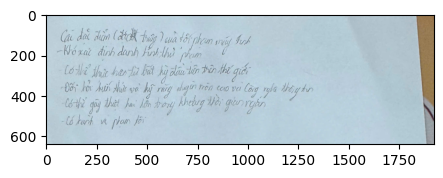

User: <image>
Trích xuất toàn bộ văn bản trong ảnh.
Assistant: Các đặc điểm (đối tượng) của tội phạm máy tính
- Khó xác định danh tính thủ phạm
- Có thể thực hiện từ bất kỳ đầu tiên trên thế giới
- Đối với kiến thức và kỹ năng chuyên môn cao và lòng nghe thông tin
- Có thể gây thiệt hại lớn trong khoảng thời gian ngắn
- Có hành vi phạm tội


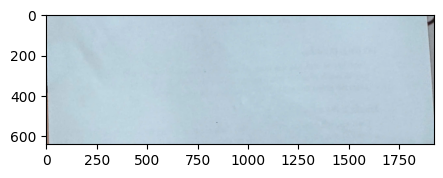

User: <image>
Trích xuất toàn bộ văn bản trong ảnh.
Assistant: Trong đó có 10 chữ số.


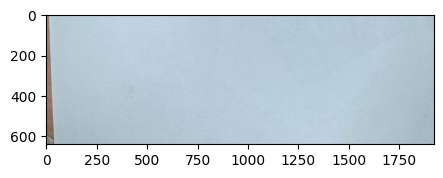

User: <image>
Trích xuất toàn bộ văn bản trong ảnh.
Assistant: Trang 12


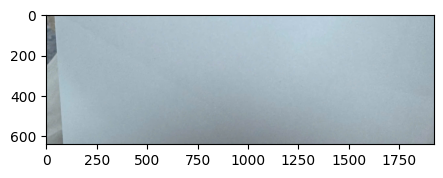

User: <image>
Trích xuất toàn bộ văn bản trong ảnh.
Assistant: Trong đó có 10 người.


In [17]:
width, height = image.size
part_height = height // 4
generation_config = dict(max_new_tokens= 1024, do_sample=False, num_beams = 3, repetition_penalty=2.0)
question = '<image>\nTrích xuất toàn bộ văn bản trong ảnh.'

for i in range(4):
    top = i * part_height
    bottom = (i + 1) * part_height if i < 3 else height  # phần cuối lấy hết phần dư
    cropped_image = image.crop((0, top, width, bottom))
    plt.figure(figsize=(5,5))
    plt.imshow(cropped_image)
    plt.show()
    pixel_values = load_image(cropped_image, max_num=12).to(torch.bfloat16).cuda()
    response = modelOCR.chat(tokenizerOCR, pixel_values, question, generation_config)
    print(f'User: {question}\nAssistant: {response}')
    print("="*30)
